<a href="https://colab.research.google.com/github/wonsub1332/DataMiningPython/blob/main/DM_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path='/content/drive/MyDrive/Colab Notebooks/data/'

In [ ]:
df=pd.read_csv(base_path+"bike_data.csv")

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011.1.1 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011.1.1 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011.1.1 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011.1.1 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011.1.1 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012.12.19 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012.12.19 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012.12.19 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012.12.19 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## Data 전처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe() ##DataFrame 의  통계적 요약

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df['season'].unique()

array([1, 2, 3, 4])

In [ ]:
df['weather'].unique()

array([1, 2, 3, 4])

In [ ]:
df['holiday'].unique()

array([0, 1])

In [ ]:
type(df['datetime'][0])

str

datetime이 문자열이기 떄문에 변환

In [ ]:
def split_date(x):
    x=x.split()
    return x;

In [ ]:
df['datetime'].apply(split_date)

0           [2011.1.1, 0:00]
1           [2011.1.1, 1:00]
2           [2011.1.1, 2:00]
3           [2011.1.1, 3:00]
4           [2011.1.1, 4:00]
                ...         
10881    [2012.12.19, 19:00]
10882    [2012.12.19, 20:00]
10883    [2012.12.19, 21:00]
10884    [2012.12.19, 22:00]
10885    [2012.12.19, 23:00]
Name: datetime, Length: 10886, dtype: object

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
type(df['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
df['minute']=df['datetime'].dt.minute
df['second']=df['datetime'].dt.second
df['day_of_week']=df['datetime'].dt.dayofweek #월=0 ~ 일=6

In [ ]:
type(df['year'][0])
type(df['month'][0])

numpy.int64

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


# Data 시각화

In [ ]:
df['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [ ]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

### BarPlot

Text(0.5, 1.0, 'Count per Year')

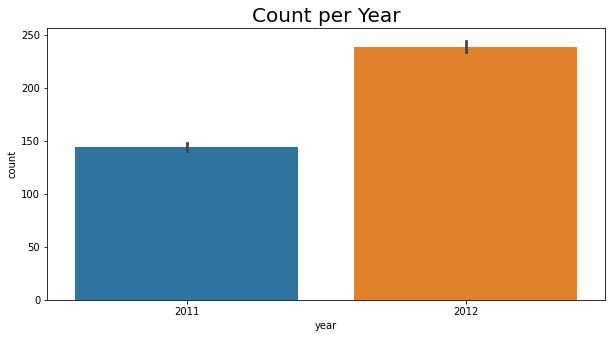

In [ ]:
fig=plt.figure(figsize=[10,5])
sns.barplot(x='year',y='count',data=df)
plt.title("Count per Year" , fontsize=20)

Text(0.5, 1.0, 'Count per Month')

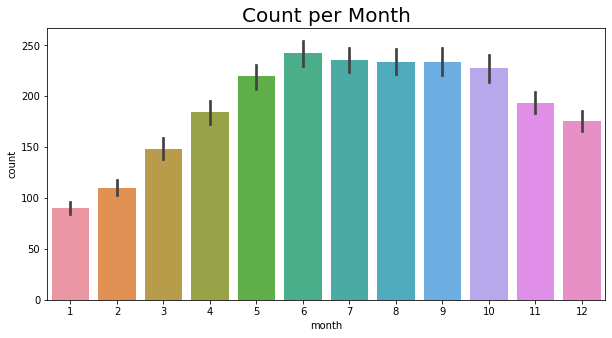

In [ ]:
fig=plt.figure(figsize=[10,5])
sns.barplot(x='month',y='count',data=df)
plt.title("Count per Month" , fontsize=20)

Text(0.5, 1.0, 'Count per day')

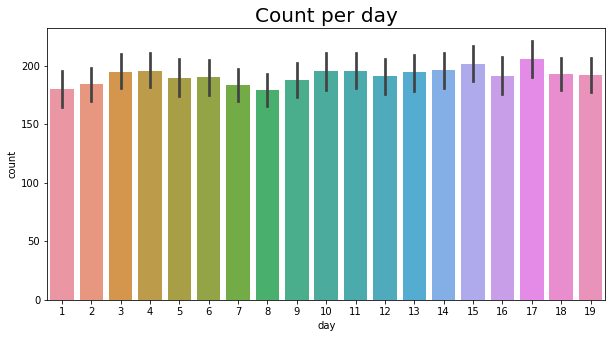

In [ ]:
fig=plt.figure(figsize=[10,5])
sns.barplot(x='day',y='count',data=df)
plt.title("Count per day" , fontsize=20)

Text(0.5, 1.0, 'Count per Hour')

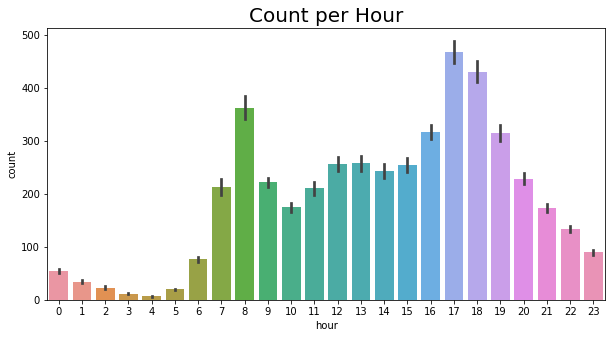

In [ ]:
fig=plt.figure(figsize=[10,5])
sns.barplot(x='hour',y='count',data=df)
plt.title("Count per Hour" , fontsize=20)

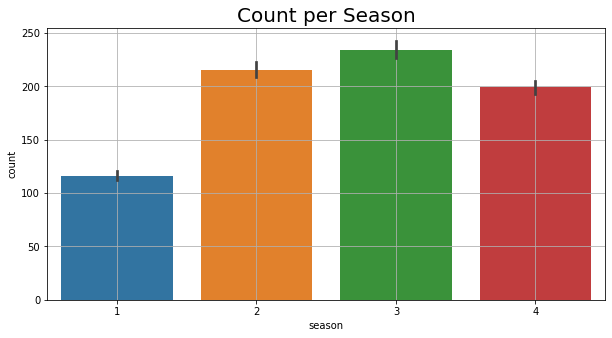

In [ ]:
fig=plt.figure(figsize=[10,5])
sns.barplot(x='season',y='count',data=df)
plt.title("Count per Season" , fontsize=20)
plt.grid(True)

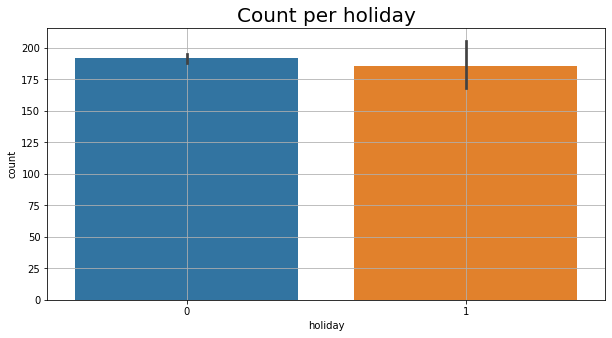

In [ ]:
fig=plt.figure(figsize=[10,5])
sns.barplot(x='holiday',y='count',data=df)
plt.title("Count per holiday" , fontsize=20)
plt.grid(True)

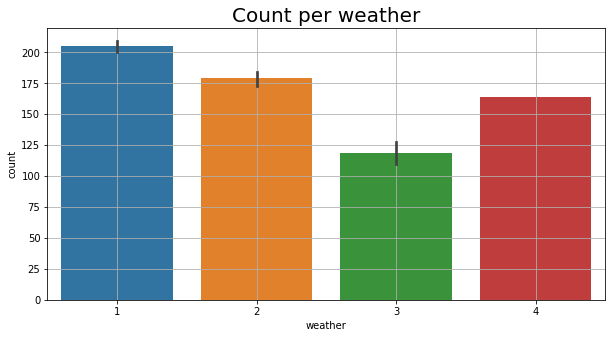

In [ ]:
fig=plt.figure(figsize=[10,5])
sns.barplot(x='weather',y='count',data=df)
plt.title("Count per weather" , fontsize=20)
plt.grid(True)

### BoxPlot :연속적인 데이터의 수치적 자료를 표현 하는 그래프

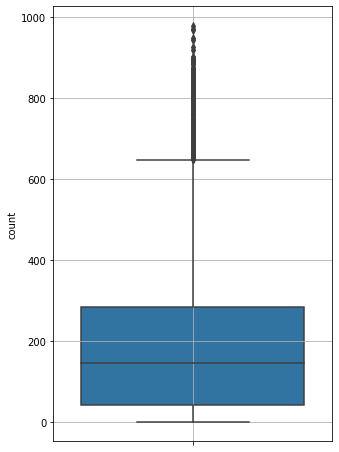

In [ ]:
fig=plt.figure(figsize=[5,8])
sns.boxplot(y='count' ,data=df)
plt.grid(True)

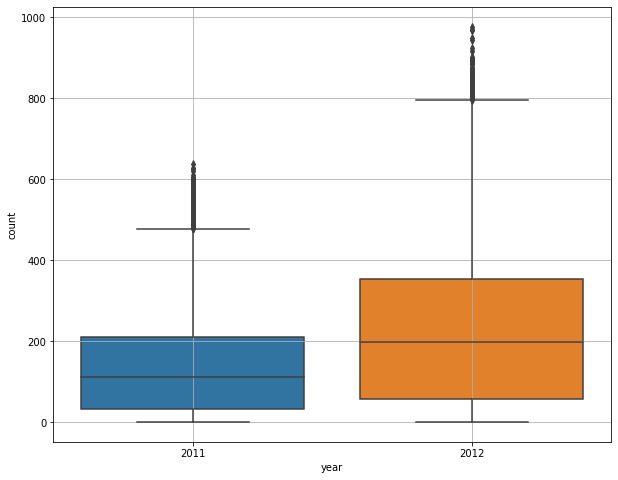

In [ ]:
fig=plt.figure(figsize=[10,8])
sns.boxplot(x='year' ,y='count' ,data=df)
plt.grid(True)

### Numerical

Text(0.5, 1.0, 'Count per humidty')

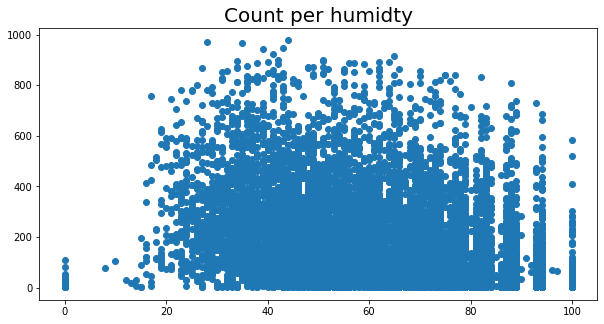

In [ ]:
fig=plt.figure(figsize=[10,5])
plt.scatter(df['humidity'],df['count'])
plt.title("Count per humidty" , fontsize=20)

Text(0.5, 1.0, 'Count per temp')

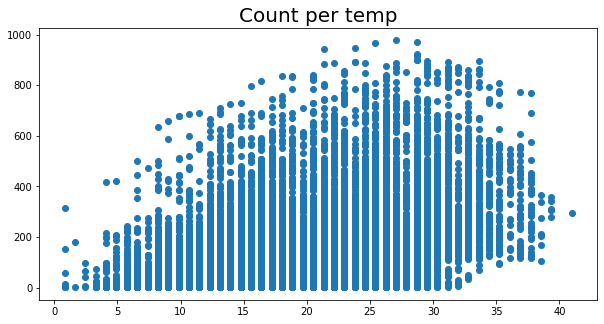

In [ ]:
fig=plt.figure(figsize=[10,5])
plt.scatter(df['temp'],df['count'])
plt.title("Count per temp" , fontsize=20)

Text(0.5, 1.0, 'Count per windspeed')

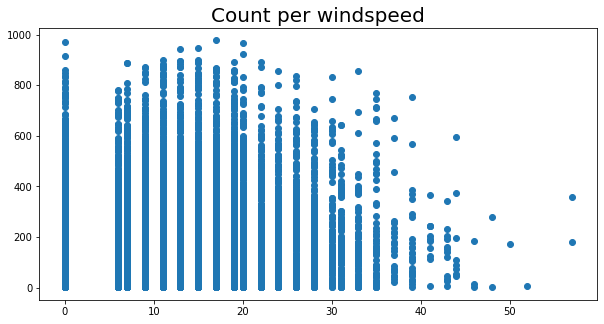

In [ ]:
fig=plt.figure(figsize=[10,5])
plt.scatter(df['windspeed'],df['count'])
plt.title("Count per windspeed" , fontsize=20)

Text(0.5, 1.0, 'Count per windspeed')

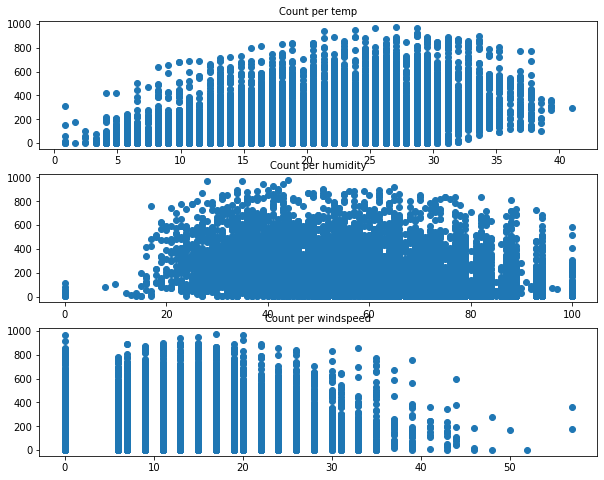

In [ ]:
fig=plt.figure(figsize=[10,8])

fig.add_subplot(3,1,1)
plt.scatter(df['temp'],df['count'])
plt.title("Count per temp" , fontsize=10)

fig.add_subplot(3,1,2)
plt.scatter(df['humidity'],df['count'])
plt.title("Count per humidity" , fontsize=10)

fig.add_subplot(3,1,3)
plt.scatter(df['windspeed'],df['count'])
plt.title("Count per windspeed" , fontsize=10)

## Feature selection

In [ ]:
df_Y=df[['count']].values

In [ ]:
df_Y.shape

(10886, 1)

In [ ]:
df=df.drop(['datetime','casual','registered'],axis=1)

In [ ]:
df=df.drop(['count'],axis=1)

In [ ]:
df=df.values

In [ ]:
df

array([[1., 0., 0., ..., 0., 0., 5.],
       [1., 0., 0., ..., 0., 0., 5.],
       [1., 0., 0., ..., 0., 0., 5.],
       ...,
       [4., 0., 1., ..., 0., 0., 2.],
       [4., 0., 1., ..., 0., 0., 2.],
       [4., 0., 1., ..., 0., 0., 2.]])

In [ ]:
df.shape

(10886, 15)

# 머신러닝 Training

train set / test set

1) Train 데이터와 Test 데이터를 나눔 

– 보통 7:3 ,8:2 train_test_split (X , Y , test_size = , random_state = )

X 는 특징 , Y는 종속 변수,

test_size : 테스트 데이터 크기 0.3 - 30 % 를 테스트 데이터로 random_state : 랜덤씨드 

– 분할 시 랜덤씨드 적용
Output : X_train , X_test , y_train, y_test feature , feature , 수요량, 수요량

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df,df_Y,test_size=0.3,random_state=0)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((7620, 15), (3266, 15), (7620, 1), (3266, 1))

2) 학습하고자 하는 머신러닝 모델 생성 , 학습

각 모델들의 특징, 하이퍼 파라미터 있음 -> 

      KNeighborsRegressor (n_neighbors = ? , weights = ? .... )

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
knn=KNeighborsRegressor()
gbm=GradientBoostingRegressor()
rf=RandomForestRegressor()

In [ ]:
knn.fit(x_train,y_train)
gbm.fit(x_train,y_train)
rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

3) 학습된 모델에 Test 데이터 입력 - > 예측값 출력
  

In [ ]:
pred_data=knn.predict(x_test)
pred_data2=gbm.predict(x_test)
pred_data3=rf.predict(x_test)

In [ ]:
pred_data2.shape

(3266,)

In [ ]:
pred_data=pred_data.reshape(-1,1)  ##예측값과 실제값의 형상을 같게 해줌
pred_data2=pred_data2.reshape(-1,1)
pred_data3=pred_data3.reshape(-1,1)

In [ ]:
pred_data2.shape

(3266, 1)

In [ ]:
y_test.shape

(3266, 1)

4)모댈 정확도 및 오차 산출

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=(mean_squared_error(y_test,pred_data))
mse2=(mean_squared_error(y_test,pred_data2))
mse3=(mean_squared_error(y_test,pred_data3))

In [ ]:
print((mse))
print((mse2))
print((mse3))

15762.232541334968
4732.925526745766
1832.0967254133495


In [ ]:
print(np.sqrt(mse))
print(np.sqrt(mse2))
print(np.sqrt(mse3))

125.54773013214921
68.79626099393604
42.80299902358887


5)정확도 사각화

(0.0, 800.0)

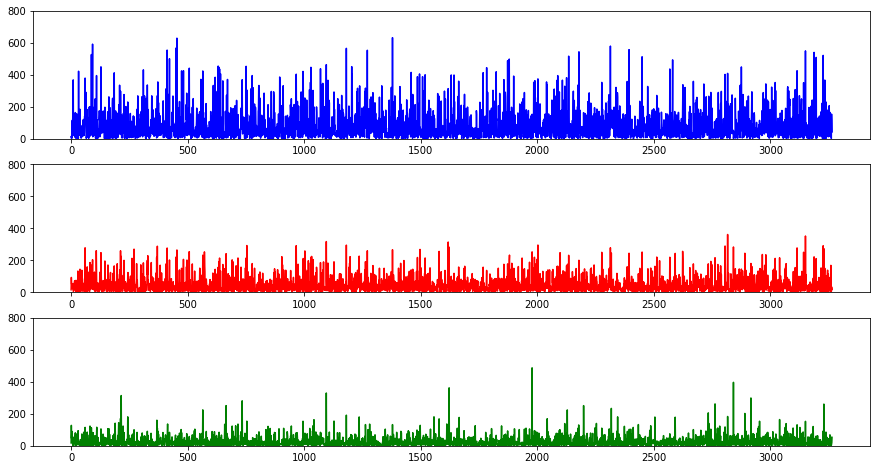

In [ ]:
fig=plt.figure(figsize=(15,8))

fig.add_subplot(3,1,1)
plt.plot(np.sqrt(np.power(pred_data-y_test,2)),color='b')
plt.ylim(0,800)

fig.add_subplot(3,1,2)
plt.plot(np.sqrt(np.power(pred_data2-y_test,2)),color='r')
plt.ylim(0,800)

fig.add_subplot(3,1,3)
plt.plot(np.sqrt(np.power(pred_data3-y_test,2)),color='g')
plt.ylim(0,800)